In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from numpy import nan

In [40]:
files_40 = [x for x in os.listdir('new_gradual_clearance/') if 'results' in x and int(x.split('_')[-1].split('.')[0])<100]
files_50 = [x for x in os.listdir('new_gradual_clearance/') if 'results' in x and int(x.split('_')[-1].split('.')[0])>=100 and int(x.split('_')[-1].split('.')[0])<200]
files_inter = [x for x in os.listdir('new_gradual_clearance/') if 'results' in x and int(x.split('_')[-1].split('.')[0])>=200]

In [41]:
a1values = np.linspace(7.7,10,100)
mvalues = np.linspace(1500,29900,100)

In [42]:
result_file

{'param': 199,
 'results': [{'m': 29900.0,
   'n': 1,
   'ap': 7.7,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 666490.4039689727,
   'Y_treatment': 79332.87905622527},
  {'m': 29900.0,
   'n': 1,
   'ap': 7.723232323232323,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 606479.8705659123,
   'Y_treatment': 76789.4320331682},
  {'m': 29900.0,
   'n': 1,
   'ap': 7.746464646464647,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 556124.7585986794,
   'Y_treatment': 74420.49366244393},
  {'m': 29900.0,
   'n': 1,
   'ap': 7.7696969696969695,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 513343.8666451493,
   'Y_treatment': 72209.03056429251},
  {'m': 29900.0,
   'n': 1,
   'ap': 7.792929292929293,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 476601.6953827035,
   'Y_treatment': 70140.12644302925},
  {'m': 29900.0,
   'n': 1,
   'ap': 7.816161616161616,
   'qd': 0.999997,
   'ttr': 0,
   'Y_control': 444743.10951775545,
   'Y_treatment': 68200.66644244552},
  {'m': 29900.0,
   '

In [43]:
results_40 = np.zeros((100,100))

for file in files_40:
    with open('new_gradual_clearance/'+file, 'rb') as f:
        result_file = pickle.load(f)
    mind = int(file.split('_')[-1].split('.')[0])
    for r in result_file['results']:
        a1ind = list(a1values).index(r['ap'])
        results_40[mind,a1ind] = r['Y_treatment']/r['Y_control']
        
results_50 = np.zeros((100,100))

for file in files_50:
    with open('new_gradual_clearance/'+file, 'rb') as f:
        result_file = pickle.load(f)
    mind = int(file.split('_')[-1].split('.')[0])-100
    for r in result_file['results']:
        a1ind = list(a1values).index(r['ap'])
        results_50[mind,a1ind] = r['Y_treatment']/r['Y_control']
        
results_inter = np.zeros((100,100))

for file in files_inter:
    with open('new_gradual_clearance/'+file, 'rb') as f:
        result_file = pickle.load(f)
    mind = int(file.split('_')[-1].split('.')[0])-200
    for r in result_file['results']:
        a1ind = list(a1values).index(r['ap'])
        results_inter[mind,a1ind] = r['Y_treatment']/r['Y_control']

In [65]:
param_grid[250]

{'T_window': (4.5, 0.5), 'm': 15843.434343434345}

In [45]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [46]:
param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'ap':[7.7,8.0,8.3,8.6,8.8]}
param_ranges = {'m':[1500,29900],
                'ap':[7.7,8.8]}

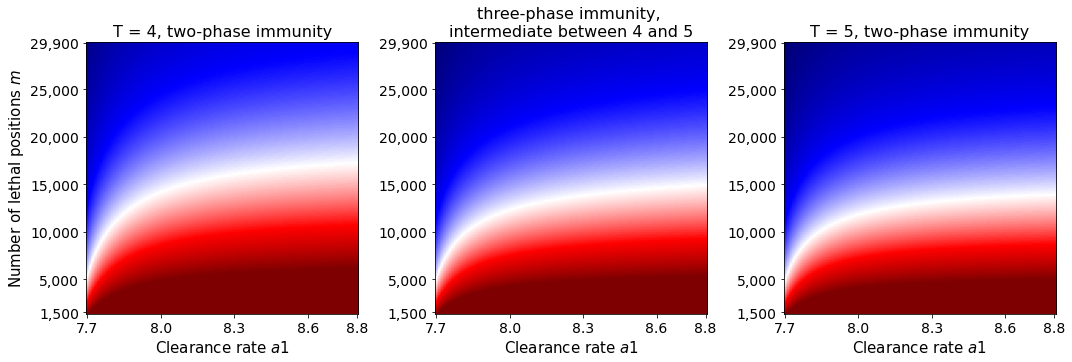

In [80]:
fig, ax = plt.subplots(1,3,figsize = (15,5))


ax[0].imshow(results_40[::-1], cmap = 'seismic', vmin = 0, vmax = 2)
ax[1].imshow(results_inter[::-1], cmap = 'seismic', vmin = 0, vmax = 2)
ax[2].imshow(results_50[::-1], cmap = 'seismic', vmin = 0, vmax = 2)

for i in range(3):
    ax[i].set_xticks(calculate_ticks(param_ticks['ap'], param_ranges['ap'], [0,99]))
    ax[i].set_xticklabels(param_ticks['ap'])
    ax[i].set_yticks(99-calculate_ticks(param_ticks['m'], param_ranges['m'], [0,99]))
    ax[i].set_yticklabels(['1,500','5,000','10,000','15,000','20,000','25,000','29,900'])
    ax[i].tick_params(labelsize = 14)
    ax[i].set_xlabel('Clearance rate $a1$', fontsize = 15)
    
ax[0].set_ylabel('Number of lethal positions $m$', fontsize = 15)

ax[0].set_title('T = 4, two-phase immunity', fontsize = 16)
ax[1].set_title('three-phase immunity, \nintermediate between 4 and 5', fontsize = 16)
ax[2].set_title('T = 5, two-phase immunity', fontsize = 16)

plt.tight_layout()
plt.savefig('gradual_immunity_comparison_FEB2.jpg', dpi = 400, bbox_inches = 'tight')

In [8]:
with open('new_gradual_clearance/paramgrid_exposure_gradualclearance.txt','rb') as f:
    param_grid = pickle.load(f)
    
param_grid_df = pd.DataFrame(param_grid)

In [6]:
along_m = sorted(list(set(result_df['m'])))

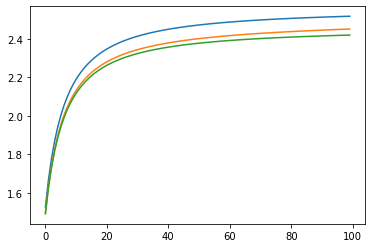

In [79]:
plt.plot(results_40[::-1][95])
plt.plot(results_inter[::-1][95])
plt.plot(results_50[::-1][95])

In [78]:
mvalues[::-1][95]

2647.4747474747473